In [1]:
import ICAtacarma as ICA
import pandas as pd


cum_file = ICA.h5_data('cum.h5')

cum_filt.h5
mask applied from cum_filt.h5 file


This cum_file is a class contains the cumulitive deformation .h5 from LiCSBAS. I choose to use unfiltered data because it keeps components more independent. If you want to use the mask from LiCSBAS, you need both the cum.h5 and cum_filt.h5 in the same directory. Also in this directory should be the hgt file

In [2]:
socompa = ICA.ICA_area(cum_file,"Socompa",(136,178),(68,129))

socompa is an area snipped out of the ICA. This area needs to be bigger than your signal idealy ecompasing other topography so ICs can be seperated.
cum_file: h5_data class
"socompa": name of the volcano
(136,178): the y range to clip from cum.h5 in LiCSBAS coordinates
(68,129): the x range to clip from cum.h5 file in LiCSBAS coordinates

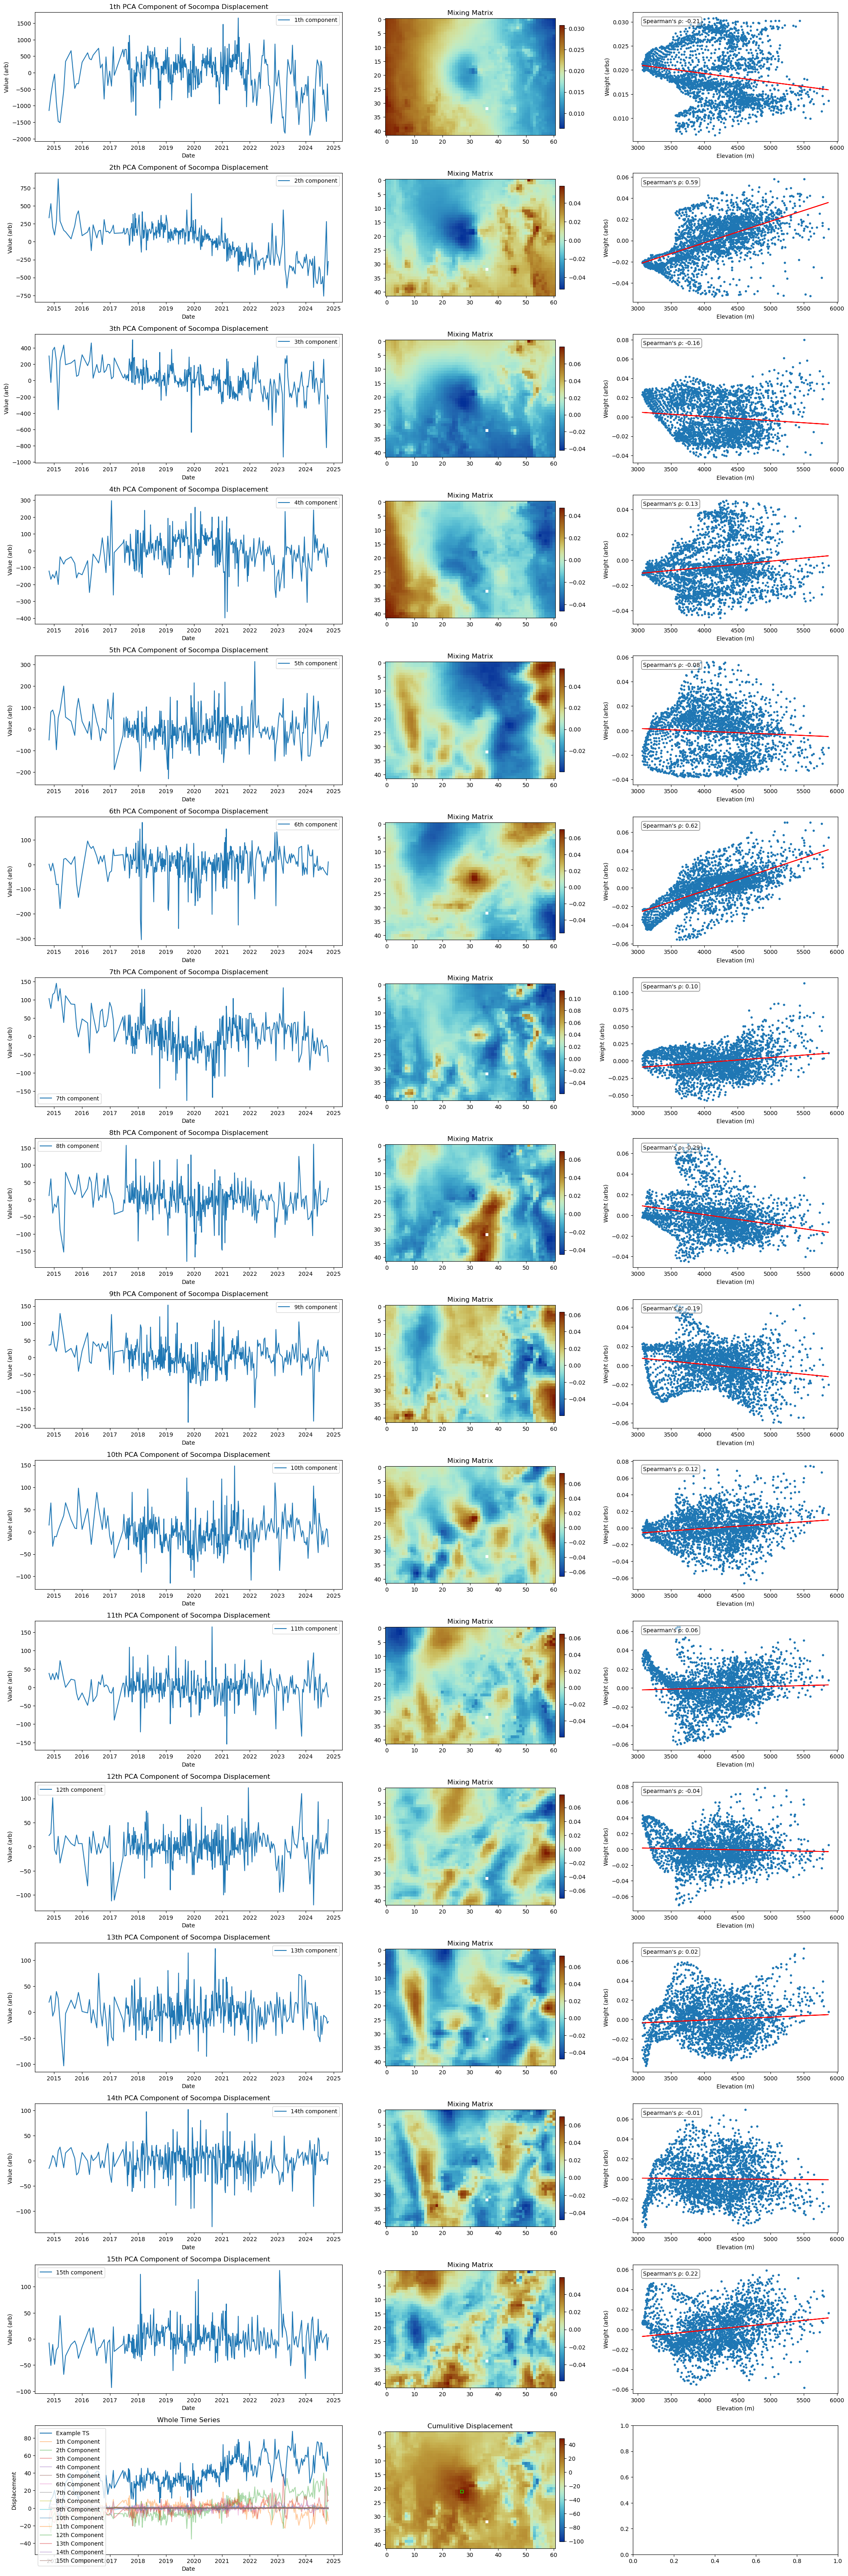

In [3]:
socompa.plot_PCA(15)

Plot the first 15 PCs to check the number of components needed to capture your deformation. Here the first 7 capture the defroamtion so a ICA of 76 components will be performed

In [4]:
n_comp=7
socompa.perform_ICA(n_comp,True)

Perform a temporal ICA on socompa with n_comp components. True means mask the data (if mask was successfully read)

1245
9.757617950439453
16.659461975097656
4.948328971862793
12.681507110595703
6.255635738372803
4.074360370635986
15.835866928100586
100.45218658447266


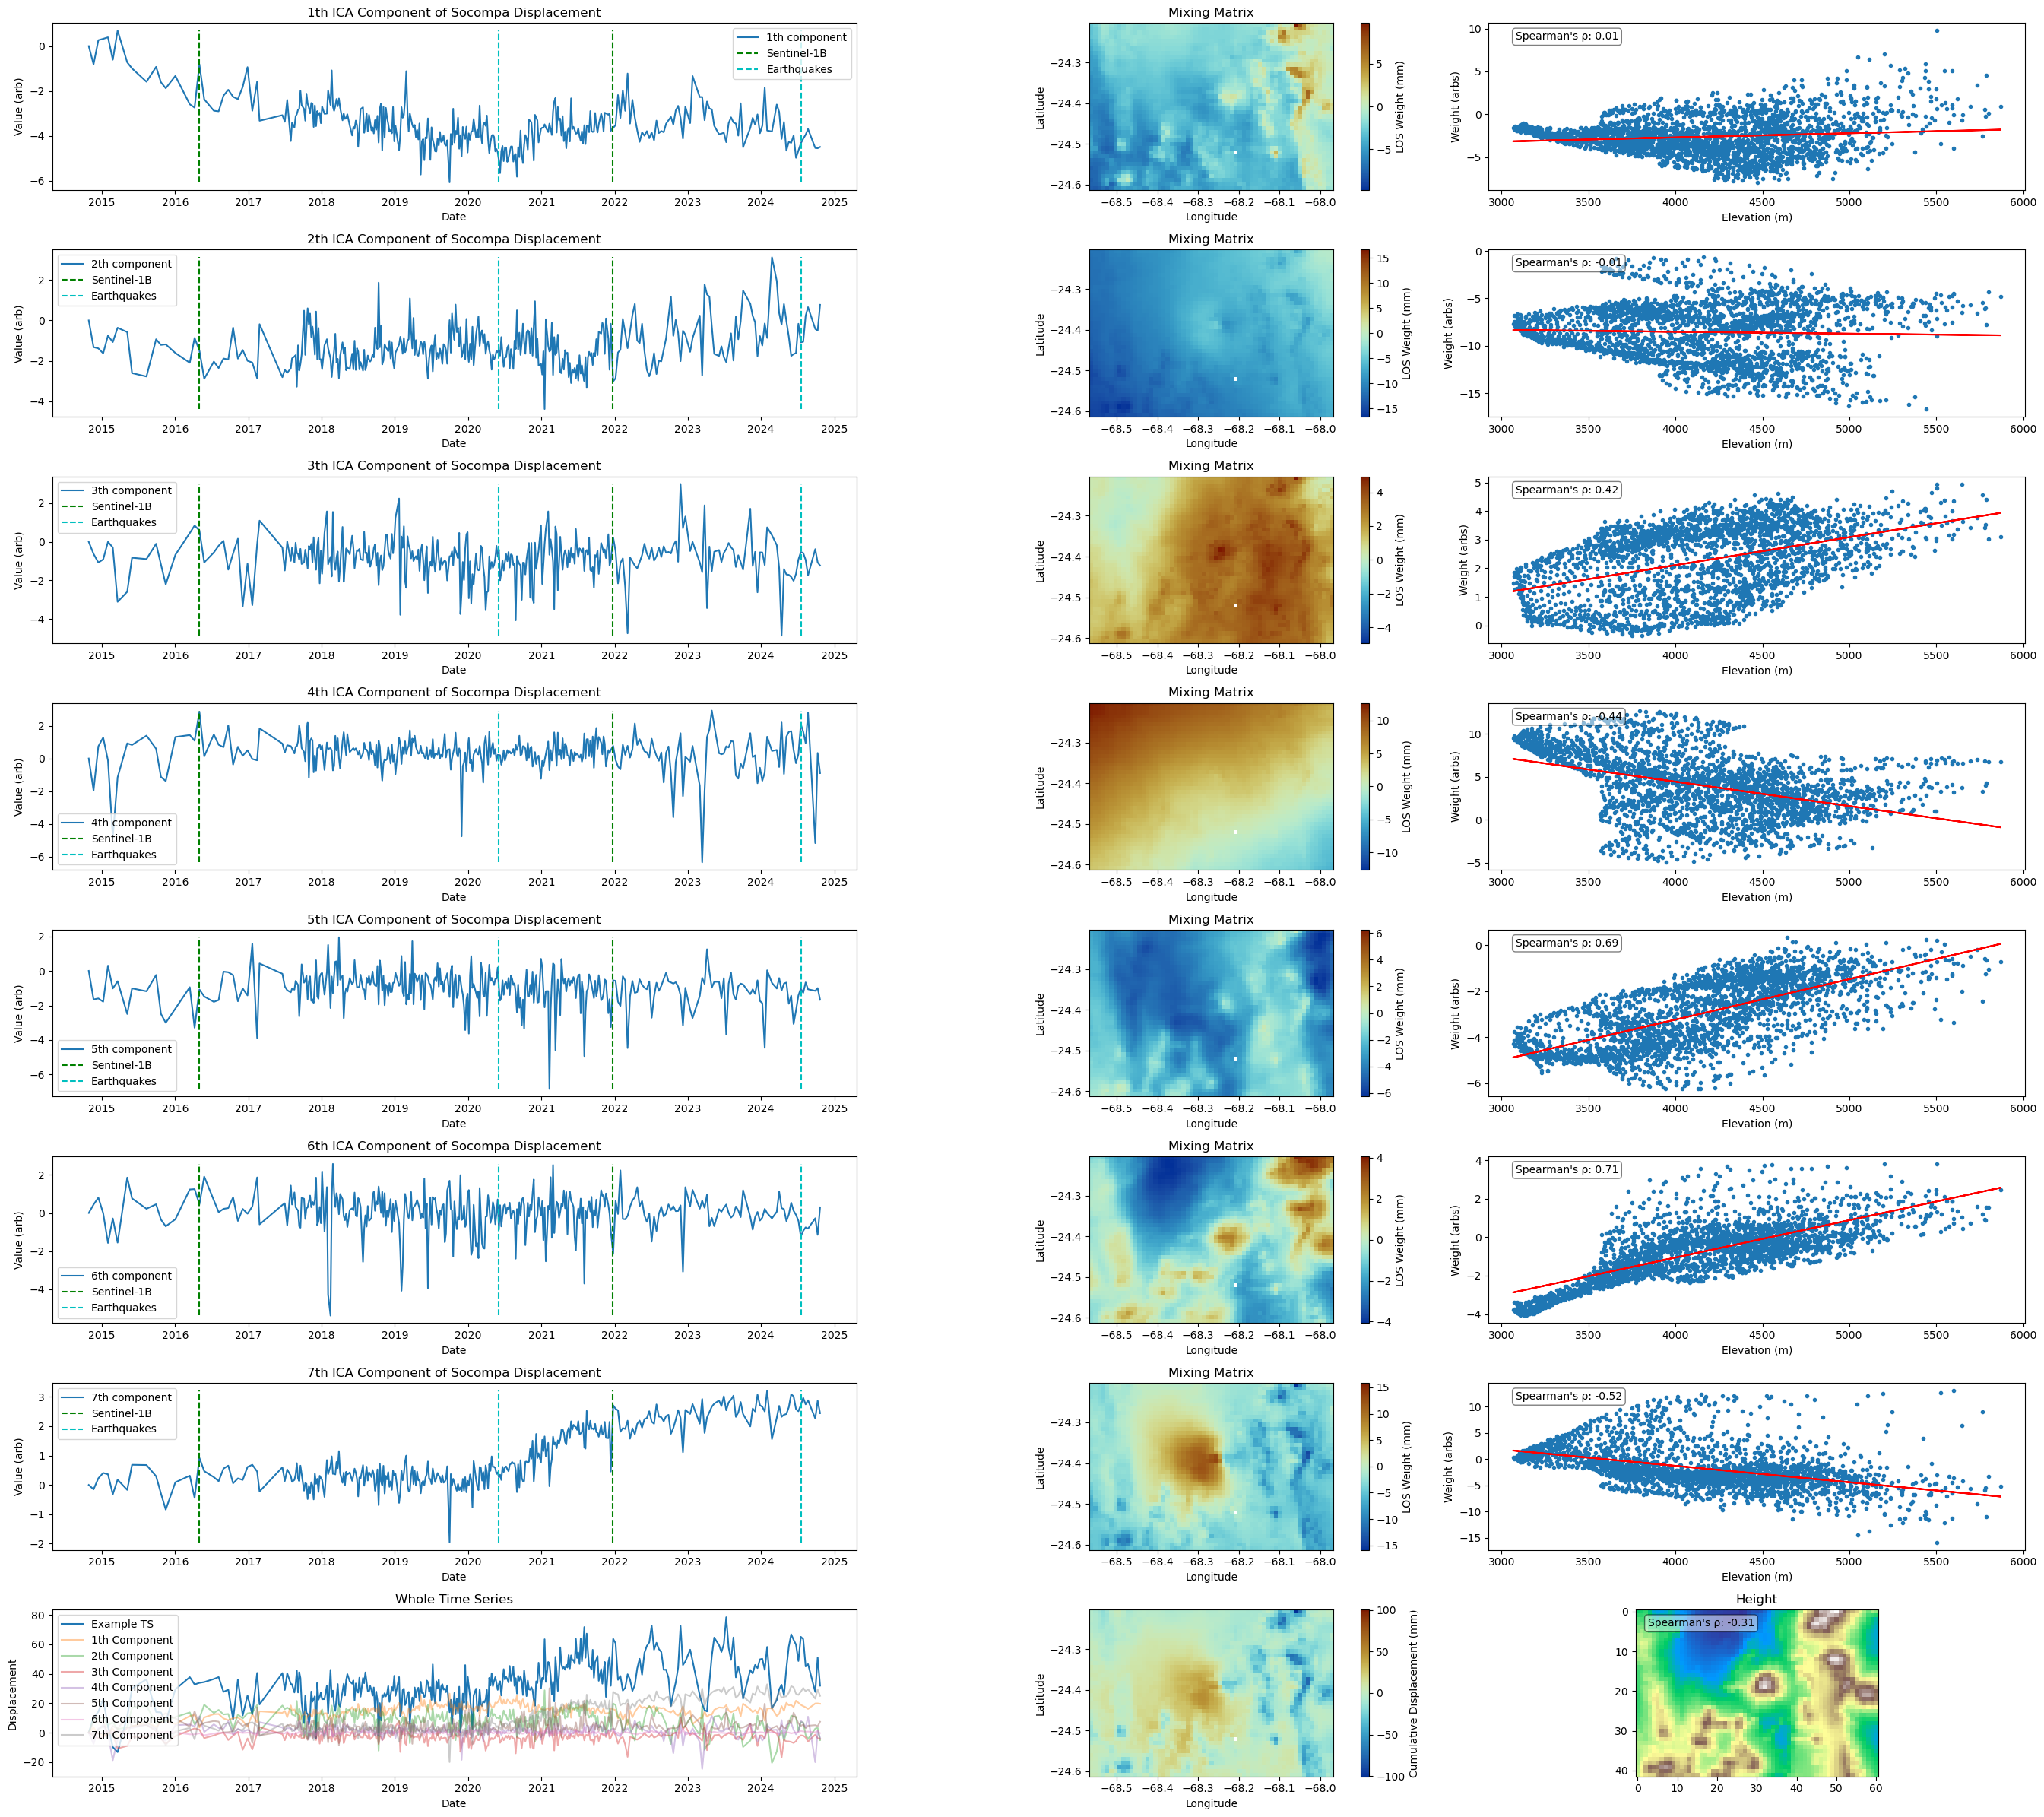

In [7]:
sentinel_1_b = ICA.important_dates((pd.to_datetime("04-28-2016"), pd.to_datetime("12-23-2021")),'Sentinel-1B','g')
earthquakes = ICA.important_dates((pd.to_datetime("06-03-2020"), pd.to_datetime("7-19-2024")),'Earthquakes','c')

important_dates = [sentinel_1_b, earthquakes]
socompa.plot_ICA((25,20),date_list=important_dates)

Plot the ICA results. First column is the temporal signal of that component, second is the weighting of that signal for each pixel and the third shows the elevation correlation. The final row has the time signal at socompa pixel (25,20) as (in format (x,y) - pixel number shown in the PCA & elevation plot)  and how each component contibutes to it. This index can also be set to "max" or "min" to show the timeseries of the largest up lift or subcidence pixel.

If there are any gaps in your timeseries at any pixel, this pixel will appear to have no data. To fix this, socompa.remove_time([4,6]) can be used to remove times at 4 and 6 from the ICA